To estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future, you can perform a time series analysis on the provided data. Time series analysis involves understanding the patterns and trends within the data over time.

1) Data Preparation:

Load the data into a suitable data structure (e.g., pandas DataFrame).
Ensure that the "Dates" column is in a datetime format and the "Prices" column is converted to numeric values.

In [1]:
import pandas as pd

# Load the data from a CSV file into a pandas DataFrame
data = pd.read_csv("/content/Nat_Gas.csv")

# Convert the "Dates" column to datetime format
data["Dates"] = pd.to_datetime(data["Dates"])

# Convert the "Prices" column to numeric values
data["Prices"] = pd.to_numeric(data["Prices"], errors="coerce")

# Display the first few rows of the prepared DataFrame
print(data.head())


       Dates  Prices
0 2020-10-31    10.1
1 2020-11-30    10.3
2 2020-12-31    11.0
3 2021-01-31    10.9
4 2021-02-28    10.9


2) Exploratory Data Analysis (EDA):

* Plot the time series data to visualize the trend, seasonality, and any patterns.
* Check for missing values, outliers, and unusual behavior.

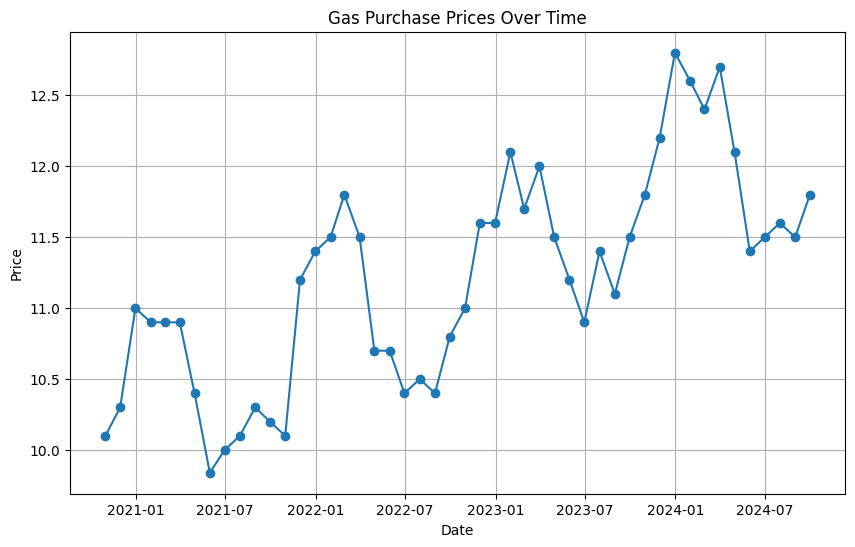

Missing Values:
 Dates     0
Prices    0
dtype: int64


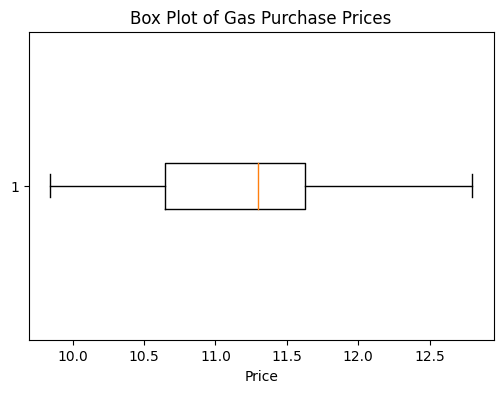

In [2]:
import matplotlib.pyplot as plt

# Plot the time series data to visualize the trend and patterns
plt.figure(figsize=(10, 6))
plt.plot(data["Dates"], data["Prices"], marker='o', linestyle='-')
plt.title("Gas Purchase Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for outliers using box plot
plt.figure(figsize=(6, 4))
plt.boxplot(data["Prices"], vert=False)
plt.title("Box Plot of Gas Purchase Prices")
plt.xlabel("Price")
plt.show()





**Observation**
* In the above time series plot we can observe seasonal patterns occurring approximately the same time each year indicating possible seasonal high and low prices.
* The time series graph indicates the prices fall as it approaches July but increases gradually from July and shoots to a new high every year closer to the month of January.
* The data distribution is right-skewed, meaning there are relatively few high gas prices that pull the median higher.


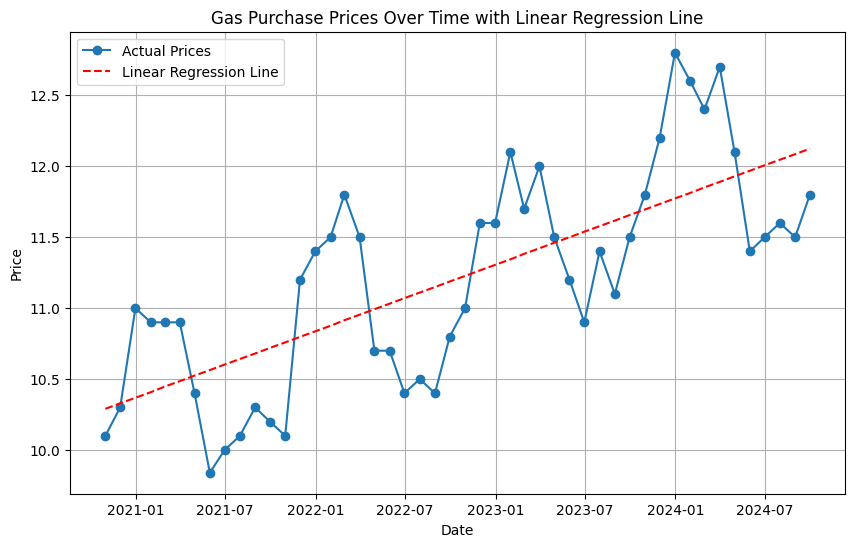

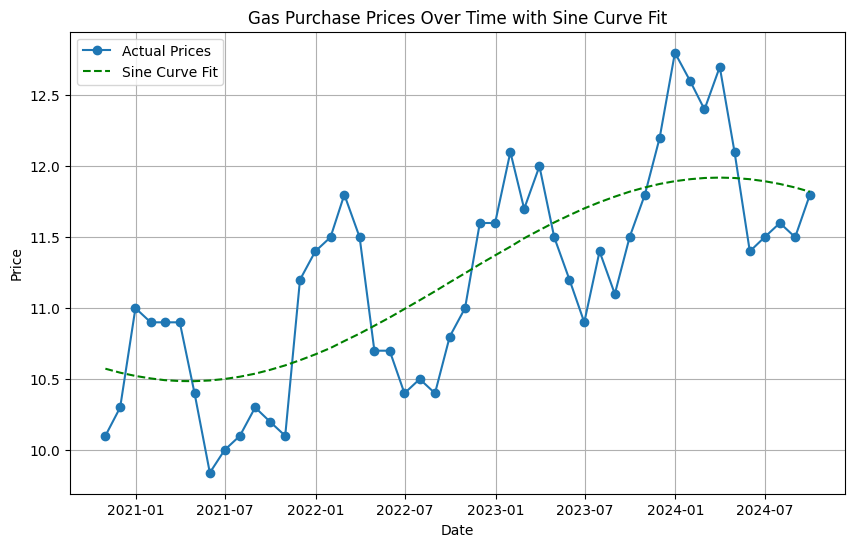

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

# ... (previous code for loading data and preparing plots)

# Adding Linear Regression Line
regressor = LinearRegression()
X = np.arange(len(data)).reshape(-1, 1)
y = data["Prices"]
regressor.fit(X, y)
regression_line = regressor.predict(X)

# Plotting with Linear Regression Line
plt.figure(figsize=(10, 6))
plt.plot(data["Dates"], data["Prices"], marker='o', linestyle='-', label="Actual Prices")
plt.plot(data["Dates"], regression_line, color='red', linestyle='--', label="Linear Regression Line")
plt.title("Gas Purchase Prices Over Time with Linear Regression Line")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Adding Sine Curve Fit
def sine_curve(x, amplitude, frequency, phase, offset):
    return amplitude * np.sin(frequency * x + phase) + offset

# Fit Sine Curve
from scipy.optimize import curve_fit
params, covariance = curve_fit(sine_curve, X.flatten(), y, p0=[1, 0.1, 0, 10])
sine_fit = sine_curve(X.flatten(), *params)

# Plotting with Sine Curve Fit
plt.figure(figsize=(10, 6))
plt.plot(data["Dates"], data["Prices"], marker='o', linestyle='-', label="Actual Prices")
plt.plot(data["Dates"], sine_fit, color='green', linestyle='--', label="Sine Curve Fit")
plt.title("Gas Purchase Prices Over Time with Sine Curve Fit")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [4]:

from scipy.interpolate import interp1d
from scipy.optimize import curve_fit



# Convert the "Dates" column to datetime format
data["Dates"] = pd.to_datetime(data["Dates"])

# Convert the "Prices" column to numeric values
data["Prices"] = pd.to_numeric(data["Prices"], errors="coerce")

# Define the interpolation/extrapolation function
def interpolate_gas_prices(dates, prices, new_dates):
    f = interp1d(dates, prices, kind="linear", fill_value="extrapolate")
    return f(new_dates)

# Create a continuous range of dates
start_date = data["Dates"].min()
end_date = data["Dates"].max()
new_dates = pd.date_range(start=start_date, end=end_date, freq="D")

# Plot the smoothed estimate of the full dataset using interpolation
smoothed_prices = interpolate_gas_prices(data["Dates"], data["Prices"], new_dates)

plt.figure(figsize=(10, 6))
plt.plot(data["Dates"], data["Prices"], marker='o', linestyle='-', label="Actual Prices")
plt.plot(new_dates, smoothed_prices, color='blue', linestyle='--', label="Smoothed Estimate")
plt.title("Gas Purchase Prices Over Time with Smoothed Estimate")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Fit the monthly input prices to the sine curve
def sine_curve(x, amplitude, frequency, phase, offset):
    return amplitude * np.sin(frequency * x + phase) + offset

# Monthly data
monthly_data = data.resample("M", on="Dates").mean()

# Fit Sine Curve
params, covariance = curve_fit(sine_curve, np.arange(len(monthly_data)), monthly_data["Prices"], p0=[1, 0.1, 0, 10])
sine_fit = sine_curve(np.arange(len(monthly_data)), *params)

plt.figure(figsize=(10, 6))
plt.plot(monthly_data["Dates"], monthly_data["Prices"], marker='o', linestyle='-', label="Monthly Prices")
plt.plot(monthly_data["Dates"], sine_fit, color='green', linestyle='--', label="Sine Curve Fit")
plt.title("Monthly Gas Purchase Prices with Sine Curve Fit")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


UFuncTypeError: ignored

SAmple Answer by JPM

In [5]:

# let's jump into task 1

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date, timedelta

date_time = ["10-2020", "11-2020", "12-2020"]
date_time = pd.to_datetime(date_time)
data = [1, 2, 3]

df = pd.read_csv('/content/Nat_Gas.csv', parse_dates=['Dates'])
prices = df['Prices'].values
dates = df['Dates'].values



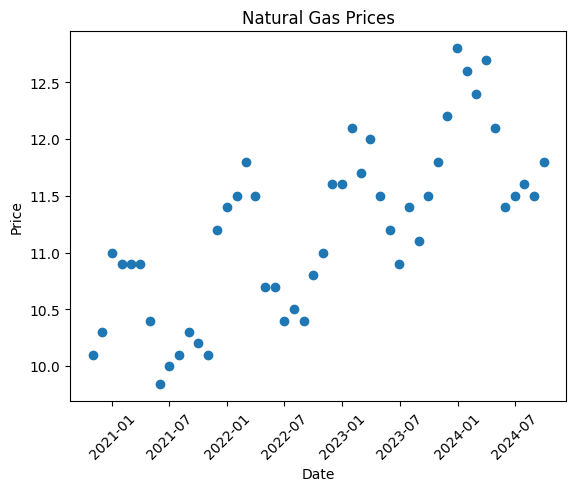

In [ ]:
# plot prices against dates
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot_date(dates, prices)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)

plt.show()


* From the plot - we can see the prices have a natural frequency of around a year, but trend upwards.
* We can do a linear regression to get the trend, and then fit a sin function to the variation in each year.

* First we need the dates in terms of days from the start, to make it easier to interpolate later.


In [6]:
start_date = date(2020,10,31)
end_date = date(2024,9,30)
months = []
year = start_date.year
month = start_date.month + 1
while True:
    current = date(year, month, 1) + timedelta(days=-1)
    months.append(current)
    if current.month == end_date.month and current.year == end_date.year:
        break
    else:
        month = ((month + 1) % 12) or 12
        if month == 1:
            year += 1

days_from_start = [(day - start_date ).days for day in months]


* Simple regression for the trend will fit to a model y = Ax + B. The estimator for the slope is given by \hat{A} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2},
* and that for the intercept by \hat{B} = \bar{y} - hat{A} * \xbar


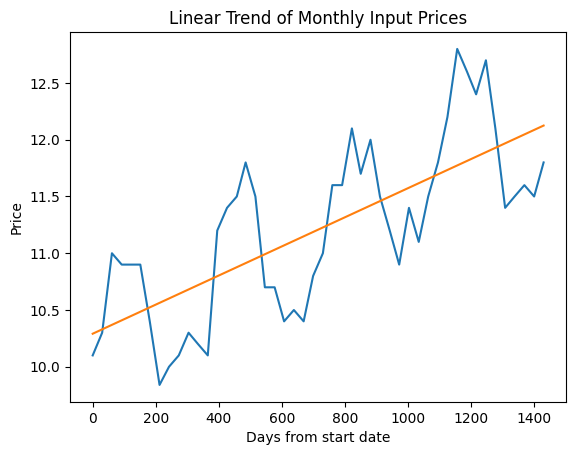

0.001282373598760221 10.29104112595228


In [7]:
def simple_regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    slope = np.sum((x - xbar) * (y - ybar))/ np.sum((x - xbar)**2)
    intercept = ybar - slope*xbar
    return slope, intercept

time = np.array(days_from_start)
slope, intercept = simple_regression(time, prices)

# Plot linear trend
plt.plot(time, prices)
plt.plot(time, time * slope + intercept)
plt.xlabel('Days from start date')
plt.ylabel('Price')
plt.title('Linear Trend of Monthly Input Prices')
plt.show()
print(slope, intercept)


* From this plot we see the linear trend has been captured. Now to fit the intra-year variation.
* Given that natural gas is used more in winter, and less in summer, we can guess the frequency of the price movements to be about a year, or 12 months.
* Therefore we have a model y = Asin( kt + z ) with a known frequency.Rewriting y = Acos(z)sin(kt) + Asin(z)cos(kt),
* we can use bilinear regression, with no intercept, to solve for u = Acos(z), w = Asin(z)


In [8]:
sin_prices = prices - (time * slope + intercept)
sin_time = np.sin(time * 2 * np.pi / (365))
cos_time = np.cos(time * 2 * np.pi / (365))

def bilinear_regression(y, x1, x2):
    # Bilinear regression without an intercept amounts to projection onto the x-vectors
    slope1 = np.sum(y * x1) / np.sum(x1 ** 2)
    slope2 = np.sum(y * x2) / np.sum(x2 ** 2)
    return(slope1, slope2)

slope1, slope2 = bilinear_regression(sin_prices, sin_time, cos_time)


* We now recover the original amplitude and phase shift as A = slope1 ** 2 + slope2 ** 2, z = tan^{-1}(slope2/slope1)

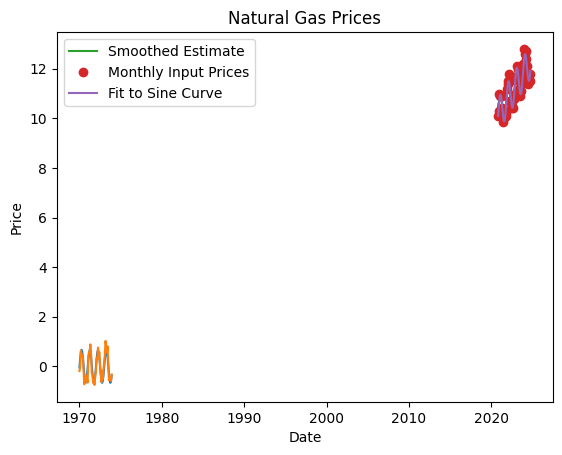

In [9]:
amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
shift = np.arctan2(slope2, slope1)
# Plot smoothed estimate of full dataset
plt.plot(time, amplitude * np.sin(time * 2 * np.pi / 365 + shift))
plt.plot(time, sin_prices)
plt.title('Smoothed Estimate of Monthly Input Prices')

# Define the interpolation/extrapolation function
def interpolate(date):
    days = (date - pd.Timestamp(start_date)).days
    if days in days_from_start:
        # Exact match found in the data
        return prices[days_from_start.index(days)]
    else:
        # Interpolate/extrapolate using the sin/cos model
        return amplitude * np.sin(days * 2 * np.pi / 365 + shift) + days * slope + intercept

# Create a range of continuous dates from start date to end date
continuous_dates = pd.date_range(start=pd.Timestamp(start_date), end=pd.Timestamp(end_date), freq='D')

# Plot the smoothed estimate of the full dataset using interpolation
plt.plot(continuous_dates, [interpolate(date) for date in continuous_dates], label='Smoothed Estimate')

# Fit the monthly input prices to the sine curve
x = np.array(days_from_start)
y = np.array(prices)
fit_amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
fit_shift = np.arctan2(slope2, slope1)
fit_slope, fit_intercept = simple_regression(x, y - fit_amplitude * np.sin(x * 2 * np.pi / 365 + fit_shift))
plt.plot(dates, y, 'o', label='Monthly Input Prices')
plt.plot(continuous_dates, fit_amplitude * np.sin((continuous_dates - pd.Timestamp(start_date)).days * 2 * np.pi / 365 + fit_shift) + (continuous_dates - pd.Timestamp(start_date)).days * fit_slope + fit_intercept, label='Fit to Sine Curve')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices')
plt.legend()
plt.show()


##JPM Task 2##
## Explaining the Methodology Adopted for this Task ##

* The given Python code implements a function `price_contract` that calculates the profit or loss obtained by
* undertaking trades on given dates for a contract involving the buying, storing, and selling of natural gas the
* storage cost of the gas, the injection/withdrawal. The value of the contract is the profit or loss obtained by
* undertaking the trades on given dates. Play around with the parameters and you'll be able to see this.
* In the end the intent for this function returns the value of the contract.
#The function takes in eight inputs:
* - `in_dates`: A list of dates on which the gas is being injected into the storage facility.
* - `in_prices`: A list of prices of gas on each of the injection dates.
* - `out_dates`: A list of dates on which the gas is being withdrawn from the storage facility.
* - `out_prices`: A list of prices of gas on each of the withdrawal dates.
* - `rate`: The rate of gas in cubic feet per day.
* - `storage_cost_rate`: A fixed monthly fee to store the gas
* - `total_vol`: The total volume of gas in cubic feet that can be stored.
* - `injection_withdrawal_cost_rate`: The injection/withdrawal cost of gas in dollars per cubic foot.

# The function first ensures that all the dates are in sequence and sorted in ascending order. Then, it iterates
* over all the dates and calculates the cash flows on each date. If the current date is an injection date, it
* injects gas into the storage facility and calculates the cost to store the gas, the cost to purchase the gas,
* and the injection cost. If the current date is a withdrawal date, it withdraws gas from the storage facility and
* calculates the cash inflow from selling the gas, the cost to store the remaining gas, and the withdrawal cost.

* Finally, the function returns the net profit or loss by subtracting the storage cost and the cost to purchase
* the gas from the cash inflow from selling the gas.

* The example usage of the `price_contract` function calculates the profit or loss for a contract that involves
* injecting gas on four different dates and withdrawing gas on four different dates, each with a different price.
*The other inputs such as the rate of gas, the storage cost rate, the total volume, and the injection/withdrawal
* cost rate are also provided. The output is printed to the console using an f-string.


In [10]:
from datetime import date
import math

def price_contract(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, total_vol, injection_withdrawal_cost_rate):
    volume = 0
    buy_cost = 0
    cash_in = 0
    last_date = min(min(in_dates), min(out_dates))

    # Ensure dates are in sequence
    all_dates = sorted(set(in_dates + out_dates))

    for i in range(len(all_dates)):
        # processing code for each date
        start_date = all_dates[i]

        if start_date in in_dates:
            # Inject on these dates and sum up cash flows
            if volume <= total_vol - rate:
                volume += rate

                # Cost to purchase gas
                buy_cost += rate * in_prices[in_dates.index(start_date)]
                # Injection cost
                injection_cost = rate * injection_withdrawal_cost_rate
                buy_cost += injection_cost
                print('Injected gas on %s at a price of %s'%(start_date, in_prices[in_dates.index(start_date)]))

            else:
                # We do not want to inject when rate is greater than total volume minus volume
                print('Injection is not possible on date %s as there is insufficient space in the storage facility'%start_date)
        elif start_date in out_dates:
            #Withdraw on these dates and sum cash flows
            if volume >= rate:
                volume -= rate
                cash_in += rate * out_prices[out_dates.index(start_date)]
                # Withdrawal cost
                withdrawal_cost = rate * injection_withdrawal_cost_rate
                cash_in -= withdrawal_cost
                print('Extracted gas on %s at a price of %s'%(start_date, out_prices[out_dates.index(start_date)]))
            else:
                # we cannot withdraw more gas than is actually stored
                print('Extraction is not possible on date %s as there is insufficient volume of gas stored'%start_date)

    store_cost = math.ceil((max(out_dates) - min(in_dates)).days // 30) * storage_cost_rate
    return cash_in - store_cost - buy_cost

# Example usage of price_contract()
in_dates = [date(2022, 1, 1), date(2022, 2, 1), date(2022, 2, 21), date(2022, 4, 1)] #injection dates
in_prices = [20, 21, 20.5, 22]#prices on the injection days
out_dates = [date(2022, 1, 27), date(2022, 2, 15), date(2022, 3, 20), date(2022, 6, 1)] # extraction dates
out_prices = [23, 19, 21, 25] # prices on the extraction days
rate = 100000  # rate of gas in cubic feet per day
storage_cost_rate = 10000  # total volume in cubic feet
injection_withdrawal_cost_rate = 0.0005  # $/cf
max_storage_volume = 500000 # maximum storage capacity of the storage facility
result = price_contract(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, max_storage_volume, injection_withdrawal_cost_rate)
print()
print(f"The value of the contract is: ${result}")


Injected gas on 2022-01-01 at a price of 20
Extracted gas on 2022-01-27 at a price of 23
Injected gas on 2022-02-01 at a price of 21
Extracted gas on 2022-02-15 at a price of 19
Injected gas on 2022-02-21 at a price of 20.5
Extracted gas on 2022-03-20 at a price of 21
Injected gas on 2022-04-01 at a price of 22
Extracted gas on 2022-06-01 at a price of 25

The value of the contract is: $399600.0


## Task 3##

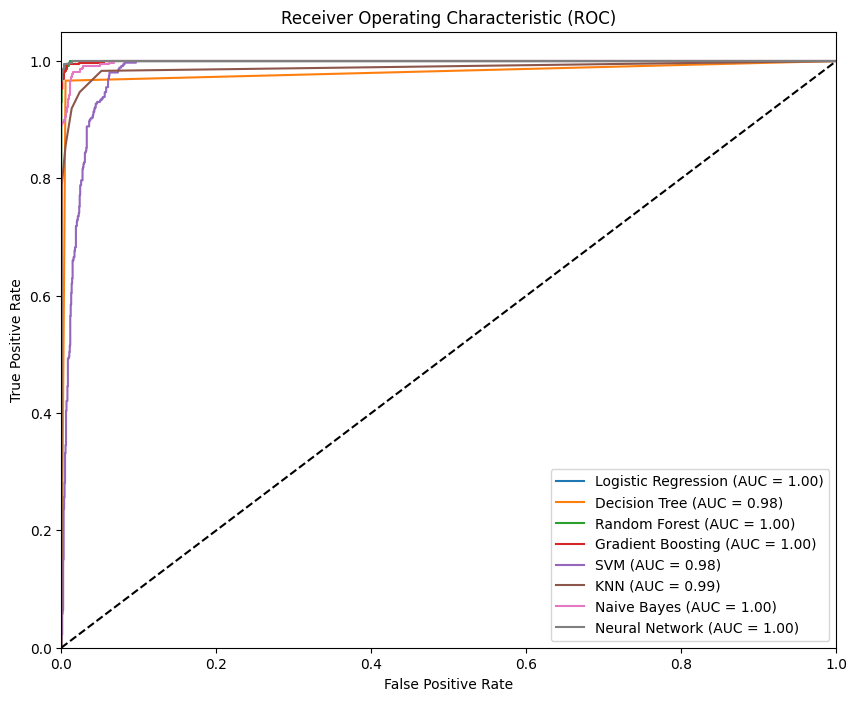

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load your data into a DataFrame
data = pd.read_csv("/content/Task 3 and 4_Loan_Data.csv")

# Define the variable features
features = ['credit_lines_outstanding', 'debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']

# Calculate the payment_to_income ratio
data['payment_to_income'] = data['loan_amt_outstanding'] / data['income']

# Calculate the debt_to_income ratio
data['debt_to_income'] = data['total_debt_outstanding'] / data['income']

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier()
}

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['default'], test_size=0.2, random_state=0)

# Initialize ROC plot
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import pandas as pd

# Read in loan data from a CSV file
df = pd.read_csv('/content/Task 3 and 4_Loan_Data.csv')

# Define the variable features
features = ['credit_lines_outstanding', 'debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']

# Calculate the payment_to_income ratio
df['payment_to_income'] = df['loan_amt_outstanding'] / df['income']

# Calculate the debt_to_income ratio
df['debt_to_income'] = df['total_debt_outstanding'] / df['income']

clf = LogisticRegression(random_state=0, solver='liblinear', tol=1e-5, max_iter=10000).fit(df[features], df['default'])
print(clf.coef_, clf.intercept_)

# Use the following code to check yourself
y_pred = clf.predict(df[features])

fpr, tpr, thresholds = metrics.roc_curve(df['default'], y_pred)
print((1.0*(abs(df['default']-y_pred)).sum()) / len(df))
print(metrics.auc(fpr, tpr))


[[ 8.18520373  0.54490854  0.01994244 -2.77630853 -0.02418391]] [-0.09162643]
0.0037
0.9925106069101026


##Task 4##

In [16]:
import pandas as pd
from math import log
import os

cwd = os.getcwd()

print("Current working directory: {0}".format(cwd))

print ("os.getcwd() returns an object of type {0}".format(type(cwd)))

# copy the filepath
os.chdir ("/content/sample_data")

df = pd.read_csv('/content/Task 3 and 4_Loan_Data.csv')

x = df['default'].to_list()
y = df['fico_score'].to_list()
n = len(x)
print (len(x), len(y))

default = [0 for i in range(851)]
total = [0 for i in range(851)]

for i in range(n):
    y[i] = int(y[i])
    default[y[i]-300] += x[i]
    total[y[i]-300] += 1

for i in range(0, 551):
    default[i] += default[i-1]
    total[i] += total[i-1]

import numpy as np

def log_likelihood(n, k):
    p = k/n
    if (p==0 or p==1):
        return 0
    return k*np.log(p)+ (n-k)*np.log(1-p)

r = 10
dp = [[[-10**18, 0] for i in range(551)] for j in range(r+1)]

for i in range(r+1):
    for j in range(551):
        if (i==0):
            dp[i][j][0] = 0
        else:
            for k in range(j):
                if (total[j]==total[k]):
                    continue
                if (i==1):
                    dp[i][j][0] = log_likelihood(total[j], default[j])
                else:
                    if (dp[i][j][0] < (dp[i-1][k][0] + log_likelihood(total[j]-total[k], default[j] - default[k]))):
                        dp[i][j][0] = log_likelihood(total[j]-total[k], default[j]-default[k]) + dp[i-1][k][0]
                        dp[i][j][1] = k

print (round(dp[r][550][0], 4))

k = 550
l = []
while r >= 0:
    l.append(k+300)
    k = dp[r][k][1]
    r -= 1

print(l)


Current working directory: /content
os.getcwd() returns an object of type <class 'str'>
10000 10000
-4217.8245
[850, 753, 752, 732, 696, 649, 611, 580, 552, 520, 300]
